# 第 1 步：导入必要的库
首先，我们需要从 Qiskit 中导入构建电路、运行模拟和可视化结果所需的工具。

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

# 第 2 步：构建量子电路
我们将创建一个包含 2 个量子比特（qubit）和 2 个经典比特（classical bit）的电路。
量子比特 是信息的基本单位，用于执行量子操作。
经典比特 用于存储测量量子比特后得到的经典结果（0 或 1）。
## 创建贝尔态的步骤如下：
    应用 H 门 (Hadamard Gate)：将第一个量子比特 q0 从初始的 |0⟩ 态变为 |0⟩ 和 |1⟩ 的叠加态。
    应用 CNOT 门 (Controlled-NOT Gate)：以第一个量子比特 q0 为控制位，第二个量子比特 q1 为目标位。如果 q0 是 |1⟩，则 q1 的状态会翻转。这个门是创造纠缠的关键。
## 我们可以把整个过程想象成准备和表演一场只有两个演员的魔术。
### 魔术的准备阶段
#### 1. qc = QuantumCircuit(2, 2)
    代码含义：创建一个量子电路（Quantum Circuit），它包含 2 个量子比特 和 2 个经典比特。
    比喻解释：
    这就像搭建一个魔术舞台。
    2 个量子比特 (qubits)：是我们的两位魔术师（演员）。他们是主角，拥有“量子”这种神奇的能力。我们称他们为演员0和演员1。
    2 个经典比特 (classical bits)：是两个用来记录结果的记分牌。它们很普通，只能显示 0 或 1。记分牌0用来记录演员0的最终状态，记分牌1用来记录演员1的最终状态。
    初始状态：在魔术开始前，两位演员都处于一个确定的、最基础的状态，我们称之为 |0⟩ 态。你可以把它想象成“准备就绪”或“立正”的姿势。此时，记分牌也是空的。
### 魔术表演开始
#### 2. qc.h(0)
    代码含义：
    对第0个量子比特（演员0）施加一个 Hadamard 门 (H门)。
    比喻解释：
    这是第一个魔术动作，只对演员0执行。
    H门 的作用是让演员进入“叠加态 (Superposition)”。
    想象一下，我们让演员0抛起一枚硬币，让它在空中不停地旋转。
    在硬币落地之前，它既不是正面也不是反面，而是同时处于“是正面”和“是反面”的叠加状态。它有50%的概率是正面（|0⟩），50%的概率是反面（|1⟩）。
    此时的状态：
    演员0：正在旋转硬币，处于 |0⟩ 和 |1⟩ 的叠加态。
    演员1：什么也没做，仍然保持“立正”姿势 (|0⟩)。
#### 3. qc.cx(0, 1)
    代码含义：施加一个 CNOT 门 (受控非门)。其中，量子比特0是控制位，量子比特1是目标位。
    比喻解释：
    这是第二个魔术动作，一个需要两位演员配合的“心灵感应”魔术。
    CNOT门 的作用是建立“纠缠 (Entanglement)”。
    我们给两位演员定下一个神秘的规则：
    “演员0（控制者），当你空中的硬币最终落地时，如果结果是反面 (|1⟩)，那么演员1（目标）必须立刻模仿你，也把他的硬币翻到反面。如果你的结果是正面 (|0⟩)，那演员1就什么都不用做，保持原样（正面）。”
    因为演员0的硬币还在旋转（处于叠加态），这个规则就将两位演员的命运绑定在了一起。他们之间形成了一种“纠缠”关系。
    此时的状态：
    两位演员进入了一个整体的、纠缠的状态。现在只有两种可能的结果，而且它们是瞬间关联的：
    可能性 A：演员0的硬币落地是正面 (|0⟩)，那么演员1也必须是正面 (|0⟩)。最终结果是 00。
    可能性 B：演员0的硬币落地是反面 (|1⟩)，那么演员1也必须是反面 (|1⟩)。最终结果是 11。
    你注意到了吗？01 和 10 这两种结果已经不可能出现了！ 这就是纠缠的魔力：只要你知道了一个演员的状态，你立刻就能知道另一个演员的状态，无论他们相隔多远。
    魔术结束，记录结果
#### 4. qc.measure([0, 1], [0, 1])
    代码含义：进行测量。将量子比特0的结果存入经典比特0，量子比特1的结果存入经典比特1。
    比喻解释：
    魔术表演结束，是时候揭晓结果了。
    测量 这个动作，就相当于让旋转的硬币落到地上，看它的最终结果是正面还是反面。
    量子的“叠加”和“纠缠”这些神奇特性只在“硬币旋转”的过程中存在。一旦测量，它们就会“坍缩”成一个确定的经典结果。
    measure([0, 1], [0, 1]) 的意思是：
    看看演员0的硬币最终是正面(0)还是反面(1)，然后把结果写到记分牌0上。
    看看演员1的硬币最终是正面(0)还是反面(1)，然后把结果写到记分牌1上。
### 最终结果：
    由于纠缠，记分牌上显示的结果只可能是 00 或 11，并且两种情况出现的概率各是50%。
#### 总结
    这四行代码合在一起，完成了一件在经典世界无法做到的事情：
    qc = QuantumCircuit(2, 2)：搭建舞台，请上两位演员和准备好记分牌。
    qc.h(0)：让演员0进入“一半是0，一半是1”的叠加态（抛起旋转的硬币）。
    qc.cx(0, 1)：让两位演员建立“同生共死”的纠缠关系（如果演员0是1，演员1也必须是1）。
    qc.measure(...)：观察最终结果，发现他们要么都是0，要么都是1，完美同步。
    这个由这四行代码创建的特殊状态 (|00⟩ + |11⟩) / √2 被称为贝尔态 (Bell State)，它是量子信息、量子通信和量子计算中最基本也最重要的概念之一。

In [3]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])

print("我们构建的量子电路如下：")
print(qc.draw('text'))

我们构建的量子电路如下：
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 



使用 Aer Sampler 在模拟器上运行电路 1024 次...
运行完成！

模拟结果：
{'00': 0.5009765625, '11': 0.4990234375}

绘制结果直方图...


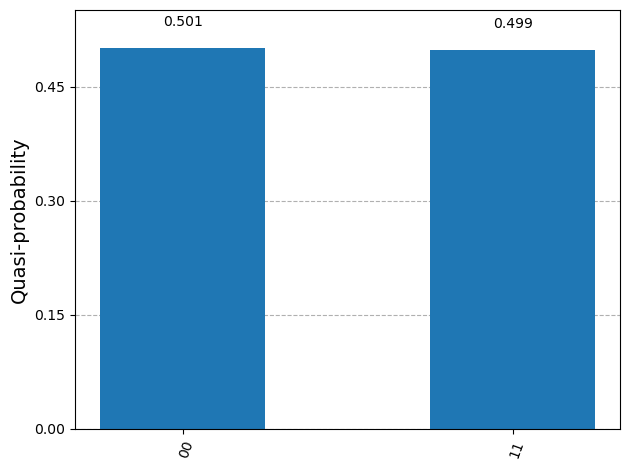

In [4]:
sampler = Sampler()


print("\n使用 Aer Sampler 在模拟器上运行电路 1024 次...")
job = sampler.run(qc, shots=1024)

result = job.result()
print("运行完成！")


quasi_distribution = result.quasi_dists[0]
counts = quasi_distribution.binary_probabilities()

print("\n模拟结果：")
print(counts)

# 使用 qiskit.visualization 里的 plot_histogram 来绘制结果的直方图
print("\n绘制结果直方图...")
plot_histogram(counts)

# 总结

In [5]:
print("\n--- 结果分析 ---")
print("理想情况下，贝尔态 |Φ+⟩ 在测量时，有 50% 的概率得到 '00'，50% 的概率得到 '11'。")
print("我们的模拟结果非常接近这个理论值。")


--- 结果分析 ---
理想情况下，贝尔态 |Φ+⟩ 在测量时，有 50% 的概率得到 '00'，50% 的概率得到 '11'。
我们的模拟结果非常接近这个理论值。
